In [74]:
import pandas as pd

In [75]:
df = pd.read_csv('data/totalData.csv')
df

C:\Users\annab\AppData\Local\Temp\ipykernel_7188\404394617.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/totalData.csv')


,Unnamed: 0,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,ListingKey,ListAgentEmail,...,LotSizeDimensions,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict
0,0,MLSListings,MLSListings,"Laminate,Tile",False,NaN,NaN,NaN,1077427852,bholmes@compass.com,...,NaN,7500.0,NaN,False,1.0,Other,94025,NaN,7500.0,NaN
1,1,SouthBay,SouthBay,NaN,True,NaN,NaN,True,1077370123,TeamLyon@LyonStahl.com,...,NaN,7051.0,4.0,True,2.0,Hermosa,90254,0.0,7051.0,NaN
2,2,MLSListings,MLSListings,NaN,False,NaN,NaN,NaN,1077294226,mbarrera0615@gmail.com,...,NaN,7600.0,NaN,False,1.0,Other,93906,NaN,7600.0,NaN
3,3,OutofAreaBoard,OutofAreaBoard,Wood,False,NaN,NaN,False,1077271803,EdanAmar@yahoo.com,...,50x124,6205.0,NaN,False,NaN,NaN,90046,NaN,6205.0,NaN
4,4,SanDiego,SanDiego,NaN,False,NaN,NaN,False,1077148727,doug@dougwestgroup.com,...,NaN,6378.0,NaN,False,3.0,NaN,92057,150.0,6378.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91067,91067,OrangeCounty,OrangeCounty,Vinyl,True,NaN,NaN,False,1038551758,patrick@patrickhourigan.com,...,NaN,3000.0,0.0,False,2.0,Capistrano Unified,92651,0.0,3000.0,NaN
91068,91068,RimOTheWorld,RimOTheWorld,"Carpet,Wood",True,NaN,NaN,False,1038339234,vickycenter@gmail.com,...,NaN,16653.0,1.0,False,2.0,Rim of the World,92352,240.0,16653.0,NaN
91069,91069,Downey,Downey,NaN,True,NaN,NaN,False,1033918791,CarlosCahuas@outlook.com,...,NaN,108900.0,4.0,False,2.0,Barstow Unified,92365,0.0,108900.0,NaN
91070,91070,Mlslistings,Mlslistings,NaN,False,NaN,NaN,NaN,1023270484,assistant@danmoskowitz.com,...,NaN,6336.0,NaN,False,2.0,Other,95121,NaN,6336.0,NaN


In [76]:
features = ['DaysOnMarket', 'NewConstructionYN', 'BedroomsTotal', 'ClosePrice', 
'BathroomsTotalInteger', 'YearBuilt', 'LivingArea', 'PostalCode', 'GarageSpaces']
drop_columns = df.columns.difference(features)

In [77]:
drop_columns

Index(['AboveGradeFinishedArea', 'AssociationFee', 'AssociationFeeFrequency',
       'AttachedGarageYN', 'BasementYN', 'BelowGradeFinishedArea',
       'BuilderName', 'BuildingAreaTotal', 'BusinessType', 'BuyerAgentAOR',
       'BuyerAgentFirstName', 'BuyerAgentLastName', 'BuyerAgentMlsId',
       'BuyerOfficeAOR', 'BuyerOfficeName', 'City', 'CloseDate',
       'CoBuyerAgentFirstName', 'CoListAgentFirstName', 'CoListAgentLastName',
       'CoListOfficeName', 'ContractStatusChangeDate', 'CountyOrParish',
       'CoveredSpaces', 'ElementarySchool', 'ElementarySchoolDistrict',
       'FireplaceYN', 'FireplacesTotal', 'Flooring', 'HighSchool',
       'HighSchoolDistrict', 'Latitude', 'Levels', 'ListAgentAOR',
       'ListAgentEmail', 'ListAgentFirstName', 'ListAgentFullName',
       'ListAgentLastName', 'ListOfficeName', 'ListingContractDate',
       'ListingId', 'ListingKey', 'ListingKeyNumeric', 'Longitude',
       'LotSizeAcres', 'LotSizeArea', 'LotSizeDimensions', 'LotSizeSquareFeet',


In [78]:
df = df.drop(columns = drop_columns)
df

,ClosePrice,LivingArea,DaysOnMarket,YearBuilt,BathroomsTotalInteger,BedroomsTotal,NewConstructionYN,GarageSpaces,PostalCode
0,3000000.0,1831.0,0,1948.0,2.0,3.0,False,1.0,94025
1,7750000.0,5000.0,0,2024.0,5.0,5.0,True,2.0,90254
2,575000.0,863.0,0,1950.0,1.0,2.0,False,1.0,93906
3,1810000.0,1338.0,0,1923.0,1.0,3.0,False,NaN,90046
4,1135000.0,3203.0,0,2009.0,4.0,4.0,False,3.0,92057
...,...,...,...,...,...,...,...,...,...
91067,4000000.0,2822.0,248,1977.0,3.0,4.0,False,2.0,92651
91068,4600000.0,5846.0,546,1985.0,7.0,6.0,False,2.0,92352
91069,170000.0,1909.0,480,1984.0,2.0,3.0,False,2.0,92365
91070,1071000.0,1720.0,23,1965.0,2.0,3.0,False,2.0,95121


In [79]:
df.isnull().sum()

ClosePrice                  2
LivingArea                 49
DaysOnMarket                0
YearBuilt                  72
BathroomsTotalInteger      17
BedroomsTotal               0
NewConstructionYN        6309
GarageSpaces             3189
PostalCode                  0
dtype: int64

In [80]:
# using standard scaler
from sklearn.preprocessing import StandardScaler

df_close = (df['ClosePrice']).to_frame()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_close)

df['ClosePrice'] = scaled_data

In [81]:
# df['AdditionalAttractionYN'] = df[['BasementYN', 'AttachedGarageYN', 'ViewYN', 'PoolPrivateYN']].any(axis = 1)
# df = df.drop(columns = ['BasementYN', 'AttachedGarageYN', 'ViewYN', 'PoolPrivateYN'])

In [82]:
df.isnull().sum()

ClosePrice                  2
LivingArea                 49
DaysOnMarket                0
YearBuilt                  72
BathroomsTotalInteger      17
BedroomsTotal               0
NewConstructionYN        6309
GarageSpaces             3189
PostalCode                  0
dtype: int64

In [83]:
# lowk lost 10k rows here... but maybe thats okay...
df = df.dropna()
df

,ClosePrice,LivingArea,DaysOnMarket,YearBuilt,BathroomsTotalInteger,BedroomsTotal,NewConstructionYN,GarageSpaces,PostalCode
0,0.850453,1831.0,0,1948.0,2.0,3.0,False,1.0,94025
1,3.184945,5000.0,0,2024.0,5.0,5.0,True,2.0,90254
2,-0.341367,863.0,0,1950.0,1.0,2.0,False,1.0,93906
4,-0.066142,3203.0,0,2009.0,4.0,4.0,False,3.0,92057
5,0.110788,2013.0,0,1969.0,2.0,4.0,False,2.0,95119
...,...,...,...,...,...,...,...,...,...
91067,1.341925,2822.0,248,1977.0,3.0,4.0,False,2.0,92651
91068,1.636808,5846.0,546,1985.0,7.0,6.0,False,2.0,92352
91069,-0.540413,1909.0,480,1984.0,2.0,3.0,False,2.0,92365
91070,-0.097597,1720.0,23,1965.0,2.0,3.0,False,2.0,95121


In [84]:
df.isnull().sum()

ClosePrice               0
LivingArea               0
DaysOnMarket             0
YearBuilt                0
BathroomsTotalInteger    0
BedroomsTotal            0
NewConstructionYN        0
GarageSpaces             0
PostalCode               0
dtype: int64

In [85]:
# finding the age of each house instead of going off of the built year
from datetime import datetime

df['YearBuilt'] = df['YearBuilt'].astype('Int64')
current_year = datetime.now().year
df['Age'] = current_year - df['YearBuilt']
df = df.drop(columns='YearBuilt')

C:\Users\annab\AppData\Local\Temp\ipykernel_7188\477140117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearBuilt'] = df['YearBuilt'].astype('Int64')
C:\Users\annab\AppData\Local\Temp\ipykernel_7188\477140117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = current_year - df['YearBuilt']


In [86]:
# want to ask claire about how to handle postal code (want to replace it with the median housing price for that zip code, 
# but potentially no info and im not sure which data csv to use...) gonna just make codes for now

df["PostalCode"] = df["PostalCode"].astype("category").cat.codes

In [87]:
df

,ClosePrice,LivingArea,DaysOnMarket,BathroomsTotalInteger,BedroomsTotal,NewConstructionYN,GarageSpaces,PostalCode,Age
0,0.850453,1831.0,0,2.0,3.0,False,1.0,850,77
1,3.184945,5000.0,0,5.0,5.0,True,2.0,81,1
2,-0.341367,863.0,0,1.0,2.0,False,1.0,821,75
4,-0.066142,3203.0,0,4.0,4.0,False,3.0,344,16
5,0.110788,2013.0,0,2.0,4.0,False,2.0,1498,56
...,...,...,...,...,...,...,...,...,...
91067,1.341925,2822.0,248,3.0,4.0,False,2.0,558,48
91068,1.636808,5846.0,546,7.0,6.0,False,2.0,466,40
91069,-0.540413,1909.0,480,2.0,3.0,False,2.0,472,41
91070,-0.097597,1720.0,23,2.0,3.0,False,2.0,1500,60


In [88]:
# can't have objects..?

# df["FireplaceYN"] = df["FireplaceYN"].astype("boolean")
df["NewConstructionYN"] = df["NewConstructionYN"].astype("boolean")
# df["ViewYN"] = df["ViewYN"].astype("boolean")
# df["BasementYN"] = df["BasementYN"].astype("boolean")
# df["PoolPrivateYN"] = df["AttachedGarageYN"].astype("boolean")
# df["AttachedGarageYN"] = df["NewConstructionYN"].astype("boolean")

In [89]:
X = df.drop(columns=["ClosePrice"])
Y = df["ClosePrice"]

In [90]:
print(X.shape)
print(Y.shape)

(81521, 8)
(81521,)


In [91]:
import numpy as np        # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from xgboost import XGBRegressor   # For XGBoost Regressor model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [93]:
model = XGBRegressor(
    n_estimators=700, learning_rate=0.03, max_depth=8, 
    subsample=0.85, colsample_bytree=0.85, 
    reg_lambda=3,  # Lowered from 10
    reg_alpha=1,  # Lowered from 5
    random_state=42
    )

In [94]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.85, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [95]:
Y_pred = model.predict(X_test)

In [96]:
mse = mean_squared_error(Y_test, Y_pred)  # Calculate the Mean Squared Error
r2 = r2_score(Y_test, Y_pred)  # Calculate R-squared (how well the model fits the data)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.3216380506587795
R-squared: 0.0908237661080269


In [97]:
print(f'Feature Importances: {model.feature_importances_}')

Feature Importances: [0.32486847 0.09570353 0.21043381 0.03914167 0.01646841 0.04086436
 0.18950489 0.08301492]


<Axes: xlabel='ClosePrice'>

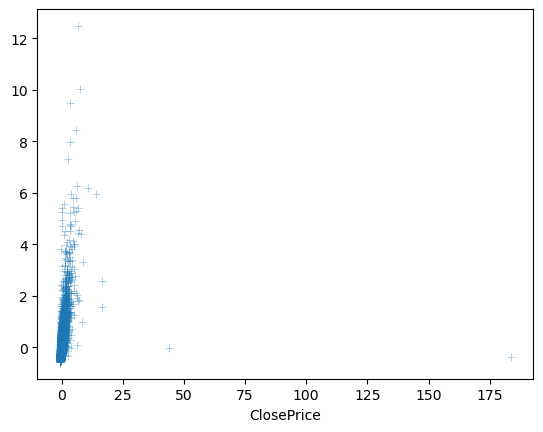

In [98]:
import seaborn as sns
sns.scatterplot(x=Y_test, y=Y_pred, marker = '+', alpha = 0.5)

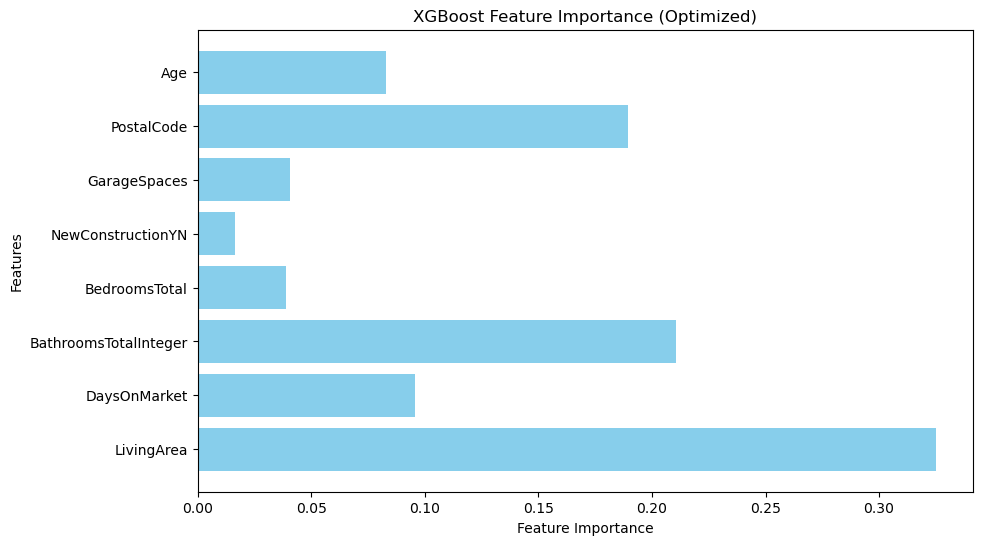

In [101]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Optimized)")
plt.show()

In [104]:
df_redfin = pd.read_csv("data\data_median_redfin.csv", dtype={"PostalCode": str}, low_memory=False)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\annab\AppData\Local\Temp\ipykernel_7188\2941741847.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_redfin = pd.read_csv("data\data_median_redfin.csv", dtype={"PostalCode": str}, low_memory=False)
